# **Module importing**

In [ ]:
!pip install transformers

import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
import transformers as ppb
from sklearn.model_selection import cross_val_score
from transformers import AutoTokenizer, AutoModel
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification
from torch.optim import AdamW, SGD
from transformers import get_linear_schedule_with_warmup
from torch.nn.utils import clip_grad_norm_
from tqdm.notebook import tqdm
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 12.0 MB/s eta 0:00:00


## **Drive mount**

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


# **Data loading**

In [ ]:
Data = []

tmp = open("/content/gdrive/MyDrive/Poem/anvari_norm.txt", encoding='utf-8')

data1 = tmp.readlines()

Data1 = []

for i in range(len(data1)):
    if len(data1[i]) <= 10:
        continue
    else:
        Data1.append(data1[i])

for i in Data1:
  Data.append(i)

tmp = open("/content/gdrive/MyDrive/Poem/bidel_norm.txt", encoding='utf-8')

data2 = tmp.readlines()

Data2 = []

for i in range(len(data2)):
    if len(data2[i]) <= 10:
        continue
    else:
        Data2.append(data2[i])

for i in Data2:
  Data.append(i)

tmp = open("/content/gdrive/MyDrive/Poem/farrokhi_norm.txt", encoding='utf-8')

data3 = tmp.readlines()

Data3 = []

for i in range(len(data3)):
    if len(data3[i]) <= 10:
        continue
    else:
        Data3.append(data3[i])

for i in Data3:
  Data.append(i)

tmp = open("/content/gdrive/MyDrive/Poem/ghaani_norm.txt", encoding='utf-8')

data4 = tmp.readlines()

Data4 = []

for i in range(len(data4)):
    if len(data4[i]) <= 10:
        continue
    else:
        Data4.append(data4[i])

for i in Data4:
  Data.append(i)

tmp = open("/content/gdrive/MyDrive/Poem/kamal_norm.txt", encoding='utf-8')

data5 = tmp.readlines()

Data5 = []

for i in range(len(data5)):
    if len(data5[i]) <= 10:
        continue
    else:
        Data5.append(data5[i])

for i in Data5:
  Data.append(i)

tmp = open("/content/gdrive/MyDrive/Poem/khaghani_norm.txt", encoding='utf-8')

data6 = tmp.readlines()

Data6 = []

for i in range(len(data6)):
    if len(data6[i]) <= 10:
        continue
    else:
        Data6.append(data6[i])

for i in Data6:
  Data.append(i)

tmp = open("/content/gdrive/MyDrive/Poem/naserkhosro_norm.txt", encoding='utf-8')

data7 = tmp.readlines()

Data7 = []

for i in range(len(data7)):
    if len(data7[i]) <= 10:
        continue
    else:
        Data7.append(data7[i])

for i in Data7:
  Data.append(i)

tmp = open("/content/gdrive/MyDrive/Poem/ouhadi_norm.txt", encoding='utf-8')

data8 = tmp.readlines()

Data8 = []

for i in range(len(data8)):
    if len(data8[i]) <= 10:
        continue
    else:
        Data8.append(data8[i])

for i in Data8:
  Data.append(i)

tmp = open("/content/gdrive/MyDrive/Poem/salman_norm.txt", encoding='utf-8')

data9 = tmp.readlines()

Data9 = []

for i in range(len(data9)):
    if len(data9[i]) <= 10:
        continue
    else:
        Data9.append(data9[i])

for i in Data9:
  Data.append(i)

tmp = open("/content/gdrive/MyDrive/Poem/vahshi_norm.txt", encoding='utf-8')

data10 = tmp.readlines()

Data10 = []

for i in range(len(data10)):
    if len(data10[i]) <= 10:
        continue
    else:
        Data10.append(data10[i])

for i in Data10:
  Data.append(i)

# **Data labels**

In [ ]:
Label = np.concatenate((np.zeros((1,len(Data1))), np.ones((1,len(Data2))),
                        2*np.ones((1,len(Data3))),3*np.ones((1,len(Data4))),
                        4*np.ones((1,len(Data5))),5*np.ones((1,len(Data6))),
                        6*np.ones((1,len(Data7))),7*np.ones((1,len(Data8))),
                        8*np.ones((1,len(Data9))),9*np.ones((1,len(Data10)))),
                        axis=1)

# **Part A**

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-fa-zwnj-base")
model = AutoModel.from_pretrained("HooshvareLab/bert-fa-zwnj-base").to(device)

Some weights of the model checkpoint at HooshvareLab/bert-fa-zwnj-base were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.poo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Data, Label.T, shuffle = True)

In [ ]:
tokenized_train = tokenizer(X_train[:10000], padding = True, truncation = True, return_tensors="pt")
tokenized_test = tokenizer(X_test[:2000] , padding = True, truncation = True,  return_tensors="pt")

print(tokenized_train.keys())

#move on device (GPU)
tokenized_train = {k:torch.tensor(v).to(device) for k,v in tokenized_train.items()}
tokenized_test = {k:torch.tensor(v).to(device) for k,v in tokenized_test.items()}

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])


<ipython-input-7-949c928866ee>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tokenized_train = {k:torch.tensor(v).to(device) for k,v in tokenized_train.items()}
<ipython-input-7-949c928866ee>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tokenized_test = {k:torch.tensor(v).to(device) for k,v in tokenized_test.items()}


# **Feature extraction with BERT**

In [ ]:
with torch.no_grad():
  hidden_train = model(**tokenized_train) #dim : [batch_size(nr_sentences), tokens, emb_dim]
  hidden_test = model(**tokenized_test)

#get only the [CLS] hidden states
cls_train = hidden_train.last_hidden_state[:,0,:]
cls_test = hidden_test.last_hidden_state[:,0,:]

# **BERT's features classification with RF classifier**

In [ ]:
x_train = cls_train.to("cpu")

x_test = cls_test.to("cpu")

print(x_train.shape, y_train[:10000].shape, x_test.shape, y_test[:2000].shape) 

dummy = DummyClassifier(strategy= "uniform")
dummy.fit(x_train,y_train[:10000])
y_pred1 = dummy.predict(x_test) 

torch.Size([10000, 768]) (10000, 1) torch.Size([2000, 768]) (2000, 1)


In [ ]:
y_pred1 = dummy.predict(x_test) 
print(classification_report(y_pred1, y_test[:2000]))

              precision    recall  f1-score   support

         0.0       0.09      0.09      0.09       175
         1.0       0.08      0.18      0.11       186
         2.0       0.11      0.08      0.09       218
         3.0       0.08      0.11      0.09       202
         4.0       0.11      0.11      0.11       196
         5.0       0.09      0.09      0.09       212
         6.0       0.07      0.05      0.05       195
         7.0       0.13      0.11      0.12       216
         8.0       0.09      0.08      0.08       198
         9.0       0.07      0.04      0.05       202

    accuracy                           0.09      2000
   macro avg       0.09      0.09      0.09      2000
weighted avg       0.09      0.09      0.09      2000



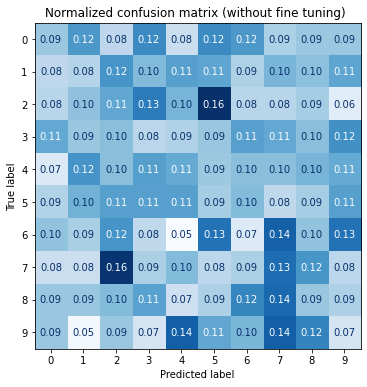

In [ ]:
def plot_confusion_matrix(y_preds, y_true, labels=None):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels) 
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False) 
  plt.title("Normalized confusion matrix (without fine tuning) ")
  plt.show()

plot_confusion_matrix(y_pred1,y_test[:2000])

# **Part B**

In [ ]:
def encode(docs):
    '''
    This function takes list of texts and returns input_ids and attention_mask of texts
    '''
    encoded_dict = tokenizer.batch_encode_plus(docs, add_special_tokens=True, max_length=128, padding='max_length',
                            return_attention_mask=True, truncation=True, return_tensors='pt')
    input_ids = encoded_dict['input_ids']
    attention_masks = encoded_dict['attention_mask']
    return input_ids, attention_masks

In [ ]:
train_input_ids, train_att_masks = encode(X_train[:10000])
test_input_ids, test_att_masks = encode(X_test[:2000])

In [ ]:
train_y = torch.LongTensor(y_train[:10000].tolist())
test_y = torch.LongTensor(y_test[:2000].tolist())
train_y.size(),test_y.size()

<ipython-input-15-f53c62033830>:1: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  train_y = torch.LongTensor(y_train[:10000].tolist())
<ipython-input-15-f53c62033830>:2: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  test_y = torch.LongTensor(y_test[:2000].tolist())


(torch.Size([10000, 1]), torch.Size([2000, 1]))

In [ ]:
BATCH_SIZE = 32
train_dataset = TensorDataset(train_input_ids, train_att_masks, train_y)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=BATCH_SIZE)

test_dataset = TensorDataset(test_input_ids, test_att_masks, test_y)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)

In [ ]:
N_labels = 10
model = BertForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-zwnj-base",
                                                      num_labels=N_labels,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at HooshvareLab/bert-fa-zwnj-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/b

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
model = model.cuda()

# **Training with Adam optimizer**

In [ ]:
EPOCHS = 10
LEARNING_RATE = 1e-6

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
scheduler = get_linear_schedule_with_warmup(optimizer, 
             num_warmup_steps=0,
            num_training_steps=len(train_dataloader)*EPOCHS )

In [ ]:
train_loss_per_epoch = []
test_loss_per_epoch = []


for epoch_num in range(EPOCHS):
    print('Epoch: ', epoch_num + 1)
    '''
    Training
    '''
    model.train()
    train_loss = 0
    for step_num, batch_data in enumerate(tqdm(train_dataloader,desc='Training')):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)
        
        loss = output.loss
        train_loss += loss.item()

        model.zero_grad()
        loss.backward()
        del loss

        clip_grad_norm_(parameters=model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

    train_loss_per_epoch.append(train_loss / (step_num + 1))              


    '''
    Testing
    '''
    model.eval()
    test_loss = 0
    test_pred = []
    with torch.no_grad():
        for step_num_e, batch_data in enumerate(tqdm(test_dataloader,desc='Testing')):
            input_ids, att_mask, labels = [data.to(device) for data in batch_data]
            output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

            loss = output.loss
            test_loss += loss.item()
   
            test_pred.append(np.argmax(output.logits.cpu().detach().numpy(),axis=-1))
        
    test_loss_per_epoch.append(test_loss / (step_num_e + 1))
    test_pred = np.concatenate(test_pred)

    '''
    Loss message
    '''
    print("{0}/{1} train loss: {2} ".format(step_num+1, math.ceil(len(train_y) / BATCH_SIZE), train_loss / (step_num + 1)))
    print("{0}/{1} val loss: {2} ".format(step_num_e+1, math.ceil(len(test_y) / BATCH_SIZE), test_loss / (step_num_e + 1)))

Epoch:  1


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 2.2426174204951277 
63/63 val loss: 2.203717689665537 
Epoch:  2


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 2.189491004989551 
63/63 val loss: 2.1585894690619574 
Epoch:  3


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 2.139752144249864 
63/63 val loss: 2.10556351570856 
Epoch:  4


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 2.0944629161121746 
63/63 val loss: 2.0680429462402588 
Epoch:  5


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 2.0589920080507906 
63/63 val loss: 2.0369104847075445 
Epoch:  6


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 2.0306668475793956 
63/63 val loss: 2.0183188555732605 
Epoch:  7


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 2.0142504963250207 
63/63 val loss: 2.005632235890343 
Epoch:  8


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 1.9985276140724888 
63/63 val loss: 1.9968778689702351 
Epoch:  9


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 1.9869234207720041 
63/63 val loss: 1.9899837194927155 
Epoch:  10


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 1.9845133063892206 
63/63 val loss: 1.9889953477042062 


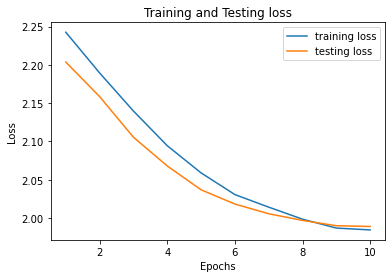

In [ ]:
epochs = range(1, EPOCHS +1 )
fig, ax = plt.subplots()
ax.plot(epochs,train_loss_per_epoch,label ='training loss')
ax.plot(epochs, test_loss_per_epoch, label = 'testing loss' )
ax.set_title('Training and Testing loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

In [ ]:
print('classifiation report')
print(classification_report(test_pred, test_y))

classifiation report
              precision    recall  f1-score   support

           0       0.08      0.20      0.12        71
           1       0.86      0.46      0.60       737
           2       0.00      0.00      0.00        18
           3       0.52      0.22      0.31       614
           4       0.21      0.17      0.19       236
           5       0.08      0.20      0.12        91
           6       0.01      0.33      0.01         3
           7       0.24      0.20      0.22       207
           8       0.03      0.23      0.05        22
           9       0.00      0.00      0.00         1

    accuracy                           0.30      2000
   macro avg       0.20      0.20      0.16      2000
weighted avg       0.53      0.30      0.37      2000



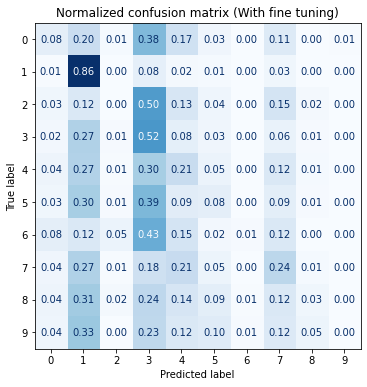

In [ ]:
def plot_confusion_matrix(y_preds, y_true, labels=None):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels) 
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False) 
  plt.title("Normalized confusion matrix (With fine tuning)")
  plt.show()

plot_confusion_matrix(test_pred,test_y)

# **Training with SGD optimizer**

In [ ]:
N_labels = 10
model1 = BertForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-zwnj-base",
                                                      num_labels=N_labels,
                                                      output_attentions=False,
                                                      output_hidden_states=False)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model1 = model.cuda()

optimizer = SGD(model1.parameters(), lr=LEARNING_RATE)
scheduler = get_linear_schedule_with_warmup(optimizer, 
             num_warmup_steps=0,
            num_training_steps=len(train_dataloader)*EPOCHS )

Some weights of the model checkpoint at HooshvareLab/bert-fa-zwnj-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/b

In [ ]:
train_loss_per_epoch = []
test_loss_per_epoch = []


for epoch_num in range(EPOCHS):
    print('Epoch: ', epoch_num + 1)
    '''
    Training
    '''
    model1.train()
    train_loss = 0
    for step_num, batch_data in enumerate(tqdm(train_dataloader,desc='Training')):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model1(input_ids = input_ids, attention_mask=att_mask, labels= labels)
        
        loss = output.loss
        train_loss += loss.item()

        model1.zero_grad()
        loss.backward()
        del loss

        clip_grad_norm_(parameters=model1.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

    train_loss_per_epoch.append(train_loss / (step_num + 1))              


    '''
    Testing
    '''
    model1.eval()
    test_loss = 0
    test_pred1 = []
    with torch.no_grad():
        for step_num_e, batch_data in enumerate(tqdm(test_dataloader,desc='Testing')):
            input_ids, att_mask, labels = [data.to(device) for data in batch_data]
            output = model1(input_ids = input_ids, attention_mask=att_mask, labels= labels)

            loss = output.loss
            test_loss += loss.item()
   
            test_pred1.append(np.argmax(output.logits.cpu().detach().numpy(),axis=-1))
        
    test_loss_per_epoch.append(test_loss / (step_num_e + 1))
    test_pred1 = np.concatenate(test_pred1)

    '''
    Loss message
    '''
    print("{0}/{1} train loss: {2} ".format(step_num+1, math.ceil(len(train_y) / BATCH_SIZE), train_loss / (step_num + 1)))
    print("{0}/{1} val loss: {2} ".format(step_num_e+1, math.ceil(len(test_y) / BATCH_SIZE), test_loss / (step_num_e + 1)))

Epoch:  1


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 2.3400343904099143 
63/63 val loss: 2.334646743441385 
Epoch:  2


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 2.3385296446827653 
63/63 val loss: 2.334463251961602 
Epoch:  3


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 2.3383246077516207 
63/63 val loss: 2.334306251435053 
Epoch:  4


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 2.337592530936098 
63/63 val loss: 2.334174636810545 
Epoch:  5


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 2.338257849026031 
63/63 val loss: 2.3340660806686158 
Epoch:  6


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 2.339711406360419 
63/63 val loss: 2.333982812033759 
Epoch:  7


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 2.3350853181113833 
63/63 val loss: 2.333920361503722 
Epoch:  8


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 2.3391347990249294 
63/63 val loss: 2.33387909995185 
Epoch:  9


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 2.339292996226789 
63/63 val loss: 2.3338573508792453 
Epoch:  10


Training:   0%|          | 0/313 [00:00<?, ?it/s]

Testing:   0%|          | 0/63 [00:00<?, ?it/s]

313/313 train loss: 2.338206566179903 
63/63 val loss: 2.3338522494785368 


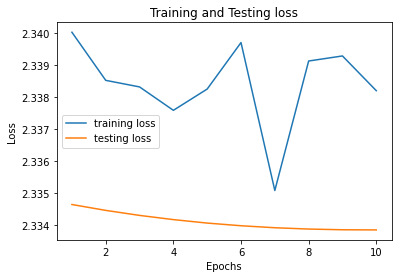

In [ ]:
epochs = range(1, EPOCHS +1 )
fig, ax = plt.subplots()
ax.plot(epochs,train_loss_per_epoch,label ='training loss')
ax.plot(epochs, test_loss_per_epoch, label = 'testing loss' )
ax.set_title('Training and Testing loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

In [ ]:
print('classifiation report')
print(classification_report(test_pred1, test_y))

classifiation report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.03      0.12      0.04        83
           2       0.21      0.08      0.11       414
           3       0.01      0.19      0.03        21
           4       0.20      0.11      0.14       351
           5       0.14      0.12      0.13       258
           6       0.04      0.04      0.04       140
           7       0.11      0.08      0.09       213
           8       0.22      0.07      0.11       476
           9       0.00      0.00      0.00        44

    accuracy                           0.09      2000
   macro avg       0.10      0.08      0.07      2000
weighted avg       0.16      0.09      0.11      2000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


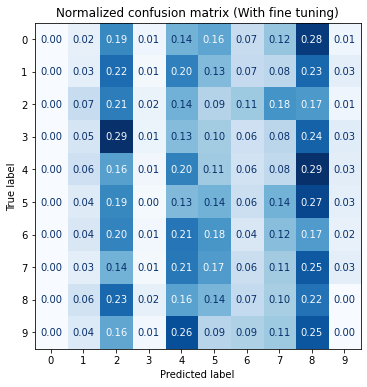

In [ ]:
plot_confusion_matrix(test_pred1,test_y)

# **Part C**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Data, Label.T, shuffle = True)

test_input_ids, test_att_masks = encode(X_test[3000:4000])
test_y = torch.LongTensor(y_test[3000:4000].tolist())
test_dataset = TensorDataset(test_input_ids, test_att_masks, test_y)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)

test_loss = 0
test_pred2 = []
with torch.no_grad():
    for step_num_e, batch_data in enumerate(tqdm(test_dataloader,desc='Testing')):
          input_ids, att_mask, labels = [data.to(device) for data in batch_data]
          output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

          loss = output.loss
          test_loss += loss.item()
   
          test_pred2.append(np.argmax(output.logits.cpu().detach().numpy(),axis=-1))

<ipython-input-99-1c180a1252b0>:4: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  test_y = torch.LongTensor(y_test[3000:4000].tolist())


Testing:   0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
test_pred1

tensor([9, 6, 8,  ..., 6, 2, 1])